# Consistency of estimators

In [1]:
import numpy as np

In [2]:
population = [2, 5, 2, 10, 6]
sample_size = 7
pop_mean = np.mean(population)
sample = np.random.choice(population, size=sample_size)

To test consistency we will increase a sample_size to check, is it true that our estimate that is obtained using estimator tend to the population mean? Let's make a function that allow us to test: is it true that particular estimator is consistent.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def test_consistency(population, estimator,
                    min_size=10,
                    max_size=1000000,
                    size_step=100):
    estimates = []
    sample_sizes = range(min_size, max_size, size_step)
    pop_mean = np.mean(population)
    for sample_size in sample_sizes:
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(sample_sizes, estimates, '.', label='estimate')
    ax1.plot(sample_sizes, np.ones_like(sample_sizes) * pop_mean)
    
    ax2.plot(sample_sizes, np.abs(np.array(estimates) - pop_mean), '.')
    ax2.plot(sample_sizes, np.zeros_like(sample_sizes))

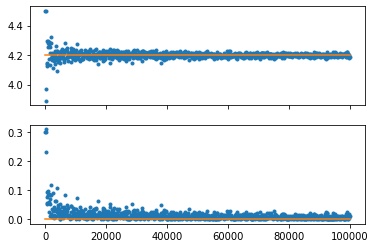

In [5]:
population = [1, 5, 4, 2, 9]
test_consistency(population, np.mean, max_size=100000)

#### In the next case our estimator is not cosistent

In [6]:
def first_element(sample):
    return sample[0]

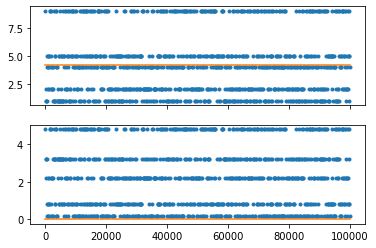

In [7]:
test_consistency(population, first_element, max_size=100000)

#### Or other case

In [8]:
def midrange(sample):
    return (np.min(sample) + np.max(sample)) / 2

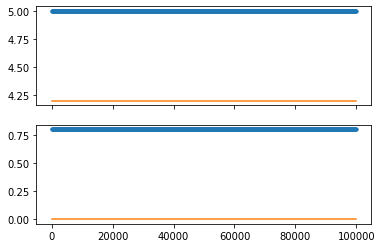

In [9]:
test_consistency(population, midrange, max_size=100000)

#### But:

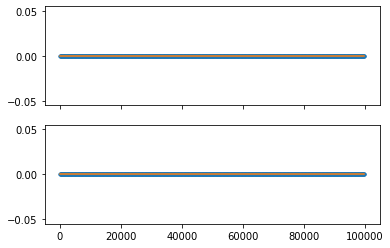

In [10]:
test_consistency([-1,1,-2,2], midrange, max_size=100000)

#### Another example

In [11]:
def mean_with_coeff(sample):
    n = len(sample)
    return np.mean(sample) * n / (n - 1)

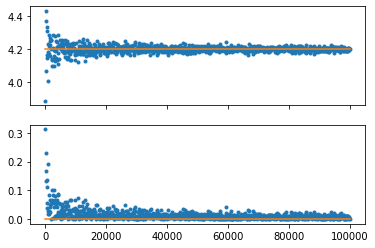

In [12]:
test_consistency(population, mean_with_coeff, max_size=100000)